# Synthetic Greenhouse Gas Emissions Dataset Generation

In [2]:
library(httr)
library(jsonlite)
library(readr)
library(ggplot2)
library(data.table)
library(utils) 
library(dplyr)
library(tidyr)
library(purrr)
library(zoo) 
library(stringr)
library(stats)
library(tibble)

In [3]:
# Load the file
data_raw <- read.csv("3A5EGHG1.csv", sep = ";", skip = 1, stringsAsFactors = FALSE, header = TRUE)
# Inspect first few rows
head(data_raw, 10)

,Year,Sector.and.Source.Categories,Carbon.Dioxide..CO2.,Methane..CH4.,Nitrous.Oxide..N2O.,Hydroflourocarbons..HFCs.
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2010,ENERGY TOTAL EMISSIONS,50697.000,1887.000,520.000,.
2,2010,ENERGY TOTAL CO2 EQUIVALENT,53105.000,.,.,.
3,2010,..Energy Industries,32803.000,49.000,168.000,.
4,2010,..Manufacturing Industries and Construction,11887.000,55.000,95.000,.
5,2010,..Other Sectors,5995.000,1692.000,257.000,.
6,2010,..Fugitive Emissions - Solid Fuels,..,90.000,..,.
7,2010,..Fugitive Emissions - Oil and Natural Gas,12.000,1.000,0.000,.
8,2010,TRANSPORT TOTAL EMISSIONS,23718.000,125.000,331.000,.
9,2010,TRANSPORT TOTAL CO2 EQUIVALENT,24174.000,.,.,.


In [4]:
# Rename columns to simplified versions
colnames(data_raw) <- c("Year", "Sector", "CO2", "CH4", "N2O", "HFCs")

# Replace '.' and '..' with NA
data_raw[data_raw == "." | data_raw == ".."] <- NA


# Preview the data
tail(data_raw, 5)


,Year,Sector,CO2,CH4,N2O,HFCs
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
134,2020,..Solid Waste Disposal,NA,11689.692,NA,NA
135,2020,..Biological Treatment of Solid Waste,NA,391.664,222.335,NA
136,2020,..Incineration and Open Burning of Waste,0.322,1.288,0.265,NA
137,2020,..Wastewater Treatment and Discharge,NA,16563.680,1253.185,NA
138,2020,TOTAL NATIONAL GHG EMISSIONS (CO2-e),204325.244,NA,NA,NA


In [5]:
# Convert CO2, CH4, N2O, and HFCs columns to numeric
data_raw$CO2 <- as.numeric(data_raw$CO2)
data_raw$CH4 <- as.numeric(data_raw$CH4)
data_raw$N2O <- as.numeric(data_raw$N2O)
data_raw$HFCs <- as.numeric(data_raw$HFCs)


In [6]:
# Remove leading ".." or "..." from Sector names
data_raw$Sector <- gsub("^\\.+", "", data_raw$Sector)

# Trim leading/trailing whitespace
data_raw$Sector <- trimws(data_raw$Sector)


In [7]:
# View cleaned sample
# head(data_raw, 10)
data_raw

Year,Sector,CO2,CH4,N2O,HFCs
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2010,ENERGY TOTAL EMISSIONS,50697,1887,520,NA
2010,ENERGY TOTAL CO2 EQUIVALENT,53105,NA,NA,NA
2010,Energy Industries,32803,49,168,NA
2010,Manufacturing Industries and Construction,11887,55,95,NA
2010,Other Sectors,5995,1692,257,NA
2010,Fugitive Emissions - Solid Fuels,NA,90,NA,NA
2010,Fugitive Emissions - Oil and Natural Gas,12,1,0,NA
2010,TRANSPORT TOTAL EMISSIONS,23718,125,331,NA
2010,TRANSPORT TOTAL CO2 EQUIVALENT,24174,NA,NA,NA


In [8]:
summary(data_raw)

      Year         Sector               CO2                CH4         
 Min.   :2010   Length:138         Min.   :-71354.7   Min.   :    0.0  
 1st Qu.:2010   Class :character   1st Qu.:   127.8   1st Qu.:    9.0  
 Median :2015   Mode  :character   Median :  6477.0   Median :  112.2  
 Mean   :2015                      Mean   : 17636.3   Mean   : 5017.9  
 3rd Qu.:2020                      3rd Qu.: 28895.8   3rd Qu.: 3000.8  
 Max.   :2020                      Max.   :232987.6   Max.   :38434.2  
                                   NA's   :41         NA's   :65       
      N2O               HFCs     
 Min.   :    0.0   Min.   : 771  
 1st Qu.:   18.7   1st Qu.:1137  
 Median :  272.8   Median :2234  
 Mean   : 1397.4   Mean   :2028  
 3rd Qu.: 1071.3   3rd Qu.:2867  
 Max.   :14880.7   Max.   :3078  
 NA's   :74        NA's   :132   

In [9]:
# Unique sectors
unique_sectors <- unique(data_raw$Sector)
length(unique_sectors)  # Number of sectors
unique_sectors

[1] 46

[1] "ENERGY TOTAL EMISSIONS"                                    
 [2] "ENERGY TOTAL CO2 EQUIVALENT"                               
 [3] "Energy Industries"                                         
 [4] "Manufacturing Industries and Construction"                 
 [5] "Other Sectors"                                             
 [6] "Fugitive Emissions - Solid Fuels"                          
 [7] "Fugitive Emissions - Oil and Natural Gas"                  
 [8] "TRANSPORT TOTAL EMISSIONS"                                 
 [9] "TRANSPORT TOTAL CO2 EQUIVALENT"                            
[10] "Domestic Aviation"                                         
[11] "Road Transport"                                            
[12] "Railways"                                                  
[13] "Water-borne Navigation"                                    
[14] "Other Transportation"                                      
[15] "AGRICULTURE TOTAL EMISSIONS"                               
[16] "AGRICULTURE TOTAL CO2 EQUIVALENT"                          
[17] "Rice Cultivation"                                          
[18] "Enteric Fermentation"                                      
[19] "Manure Management"                                         
[20] "Direct N2O Emissions from Managed Soils"                   
[21] "Indirect N2O Emissions from Managed Soils"                 
[22] "Direct N2O Emissions from Manure Management"               
[23] "Biomass Burning in Croplands and Grasslands"               
[24] "Liming"                                                    
[25] "Urea Application"                                          
[26] "FORESTRY AND OTHER LAND USE TOTAL EMISSIONS"               
[27] "FORESTRY AND OTHER LAND USE TOTAL CO2 EQUIVALENT"          
[28] "Biomass Carbon Stock Silvopasture"                         
[29] "Biomass Carbon Stock"                                      
[30] "Biomass Carbon Stock Deforestation"                        
[31] "Biomass Carbon Stock Agroforestry/Perennial Crop"          
[32] "Biomass Burning - Forests"                                 
[33] "INDUSTRIAL PROCESSES AND PRODUCT USE TOTAL EMISSIONS"      
[34] "INDUSTRIAL PROCESS AND PRODUCT USE TOTAL CO2 EQUIVALENT"   
[35] "Mineral Industry"                                          
[36] "Chemical Industry"                                         
[37] "Metal Industry"                                            
[38] "Non-Energy Products from Fuels and Solvent Use"            
[39] "Product Uses as Substitutes for Ozone-Depleting Substances"
[40] "WASTES TOTAL EMISSIONS"                                    
[41] "WASTES TOTAL CO2 EQUIVALENT"                               
[42] "Solid Waste Disposal"                                      
[43] "Biological Treatment of Solid Waste"                       
[44] "Incineration and Open Burning of Waste"                    
[45] "Wastewater Treatment and Discharge"                        
[46] "TOTAL NATIONAL GHG EMISSIONS (CO2-e)"

In [ ]:
# --- Step 2: Plot CO2 emissions time series for selected sectors ---

# Step 1: Keep original 2010–2020 data with at least one gas value present
data_clean <- data_raw %>%
  filter(!is.na(CO2) | !is.na(CH4) | !is.na(N2O) | !is.na(HFCs))

# Unique sectors, gases, and future years
sectors <- unique(data_clean$Sector)
gases <- c("CO2", "CH4", "N2O", "HFCs")
years_future <- 2021:2050

# Function to impute missing values via linear interpolation in historical data
impute_linear <- function(df) {
  # Ensure data is sorted by Year
  df <- df %>% arrange(Year)
  # Apply na.approx interpolation; if leading/trailing NAs, keep them as NA
  df$Value <- na.approx(df$Value, x = df$Year, na.rm = FALSE)
  return(df)
}

# Function to simulate emissions per sector-gas with imputation and regression forecasting
simulate_emissions <- function(sector, gas) {
  # Extract historical data for sector-gas
  df_sector <- data_clean %>%
    filter(Sector == sector) %>%
    select(Year, Value = all_of(gas))
  
  # Impute missing values in historical data using linear interpolation
  df_imputed <- impute_linear(df_sector)
  
  # Filter out any remaining NAs after interpolation (e.g., leading/trailing)
  df_model <- df_imputed %>% filter(!is.na(Value))
  
  if (nrow(df_model) >= 3) {
    # Fit linear regression model on imputed data
    model <- lm(Value ~ Year, data = df_model)
    # Predict future values for 2021-2050
    future_values <- predict(model, newdata = data.frame(Year = years_future))
  } else if (nrow(df_model) > 0) {
    # Not enough points for regression: repeat last known value
    future_values <- rep(tail(df_model$Value, 1), length(years_future))
  } else {
    # No data at all: fill with NA to reflect missingness
    future_values <- rep(NA_real_, length(years_future))
  }
  
  # Return synthetic future data in long format
  data.frame(
    Year = years_future,
    Sector = sector,
    Gas = gas,
    Value = future_values
  )
}

# Step 2: Generate synthetic future data for all sector-gas combinations
synthetic_data_long <- expand_grid(Sector = sectors, Gas = gases) %>%
  pmap_dfr(~simulate_emissions(..1, ..2))

# Step 3: Pivot synthetic data to wide format (Year, Sector, CO2, CH4, N2O, HFCs)
synthetic_data <- synthetic_data_long %>%
  pivot_wider(names_from = Gas, values_from = Value) %>%
  arrange(Year, Sector)

# Step 4: Prepare original real data (keep original NAs, no imputation here)
real_data <- data_clean %>%
  select(Year, Sector, all_of(gases)) %>%
  arrange(Year, Sector)

# Step 5: Combine real historical and synthetic future data
combined_data <- bind_rows(real_data, synthetic_data) %>%
  arrange(Sector, Year)

# Optional: Trim whitespace in Sector names
combined_data$Sector <- stringr::str_trim(combined_data$Sector)

# Step 6: Save combined dataset to CSV
write_csv(combined_data, "phil_synthetic_ghg_emissions_2010_2050.csv")

# Summary message
cat("Saved combined dataset with imputed historical data and synthetic forecasts from 2010 to 2050.\n")

Saved combined dataset with imputed historical data and synthetic forecasts from 2010 to 2050.


In [11]:
combined_data

Year,Sector,CO2,CH4,N2O,HFCs
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2010,AGRICULTURE TOTAL CO2 EQUIVALENT,43152.00,NA,NA,NA
2015,AGRICULTURE TOTAL CO2 EQUIVALENT,52703.55,NA,NA,NA
2020,AGRICULTURE TOTAL CO2 EQUIVALENT,54080.00,NA,NA,NA
2021,AGRICULTURE TOTAL CO2 EQUIVALENT,56535.31,NA,NA,NA
2022,AGRICULTURE TOTAL CO2 EQUIVALENT,57628.11,NA,NA,NA
2023,AGRICULTURE TOTAL CO2 EQUIVALENT,58720.91,NA,NA,NA
2024,AGRICULTURE TOTAL CO2 EQUIVALENT,59813.71,NA,NA,NA
2025,AGRICULTURE TOTAL CO2 EQUIVALENT,60906.51,NA,NA,NA
2026,AGRICULTURE TOTAL CO2 EQUIVALENT,61999.31,NA,NA,NA


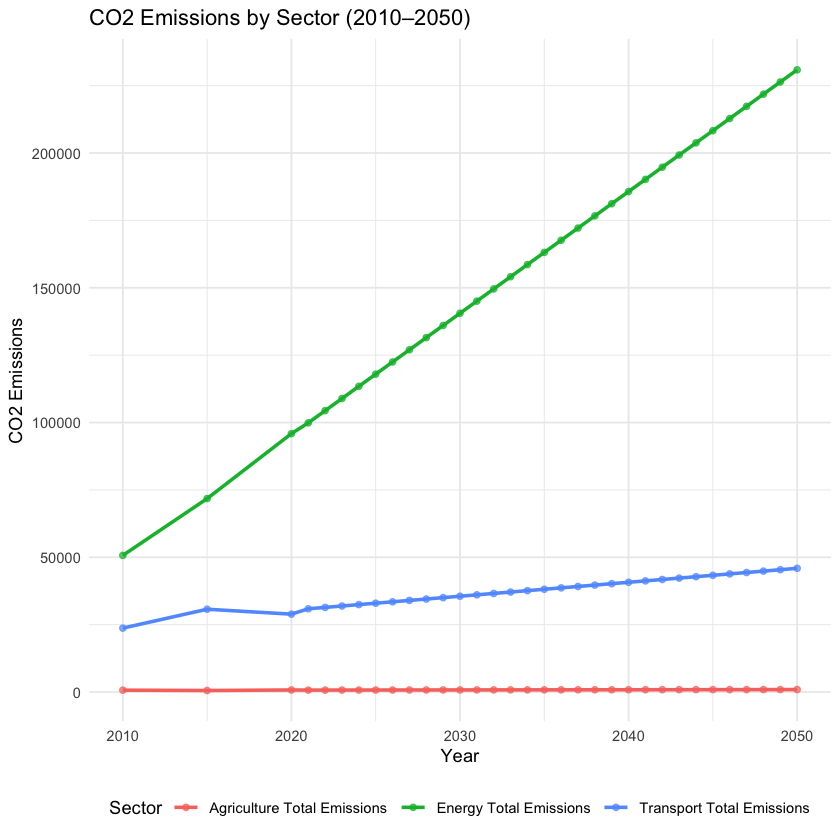

In [12]:
# --- Step 2: Plot CO2 emissions time series for selected sectors ---

sectors_to_plot <- c("ENERGY TOTAL EMISSIONS", "TRANSPORT TOTAL EMISSIONS", "AGRICULTURE TOTAL EMISSIONS")

plot_data <- combined_data %>%
  filter(Sector %in% sectors_to_plot) %>%
  mutate(Sector = str_to_title(Sector))

ggplot(plot_data, aes(x = Year, y = CO2, color = Sector)) +
  geom_line(linewidth = 1) +
  geom_point(size = 1.5, alpha = 0.7) +
  labs(title = "CO2 Emissions by Sector (2010–2050)",
       x = "Year",
       y = "CO2 Emissions",
       color = "Sector") +
  theme_minimal() +
  theme(legend.position = "bottom")

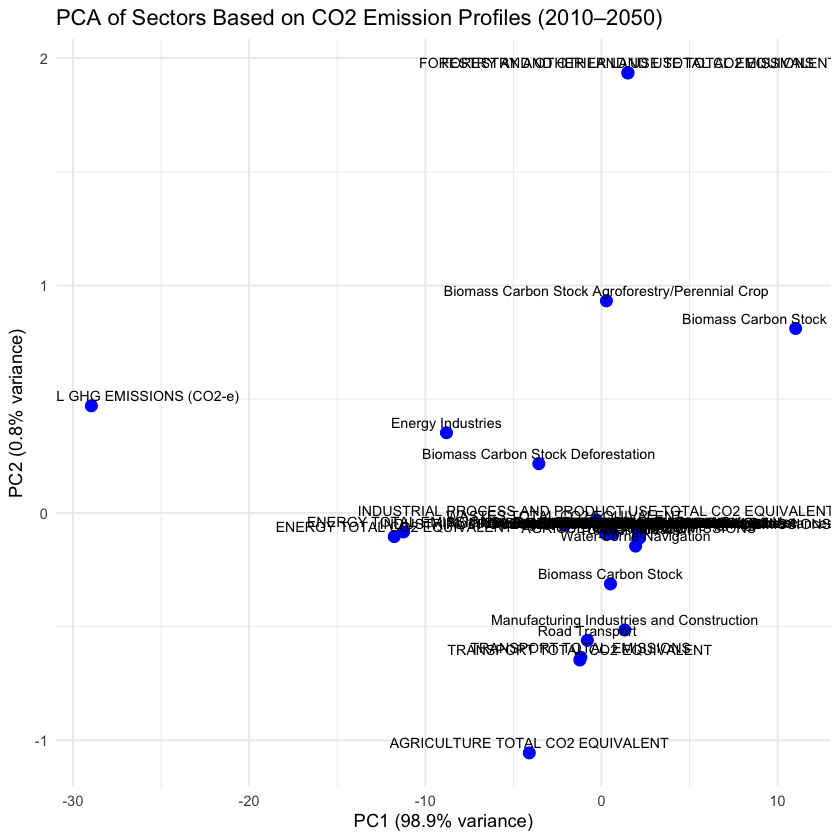

In [13]:
# --- Step 3: PCA visualization without ggfortify ---

# Prepare data for PCA: sectors as rows, years as columns, CO2 emissions only
pca_data <- combined_data %>%
  select(Year, Sector, CO2) %>%
  pivot_wider(names_from = Year, values_from = CO2) %>%
  column_to_rownames("Sector")

# Replace NAs with zeros (or consider other imputation if preferred)
pca_data[is.na(pca_data)] <- 0

# Perform PCA
pca_result <- prcomp(pca_data, scale. = TRUE)

# Extract first two principal components
pca_scores <- as.data.frame(pca_result$x[, 1:2])
pca_scores$Sector <- rownames(pca_scores)

# Plot PCA with ggplot2
ggplot(pca_scores, aes(x = PC1, y = PC2, label = Sector)) +
  geom_point(color = "blue", size = 3) +
  geom_text(vjust = -0.5, hjust = 0.5, size = 3) +
  labs(title = "PCA of Sectors Based on CO2 Emission Profiles (2010–2050)",
       x = paste0("PC1 (", round(summary(pca_result)$importance[2,1]*100, 1), "% variance)"),
       y = paste0("PC2 (", round(summary(pca_result)$importance[2,2]*100, 1), "% variance)")) +
  theme_minimal()

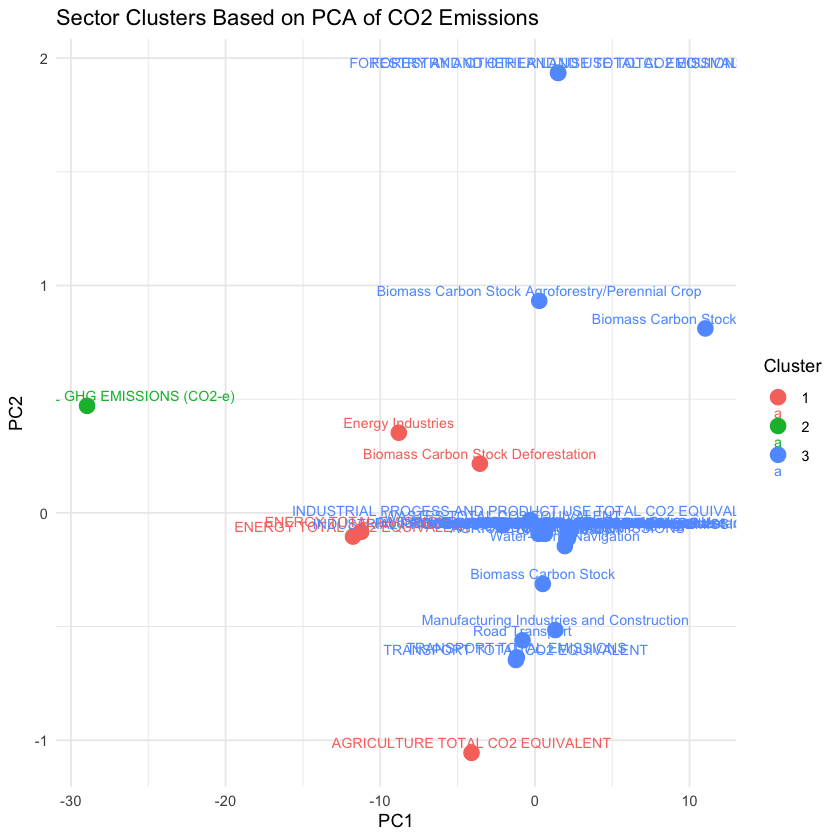

In [14]:
set.seed(123)
k <- 3  # number of clusters
clusters <- kmeans(pca_scores[, c("PC1", "PC2")], centers = k, nstart = 25)
pca_scores$Cluster <- factor(clusters$cluster)

ggplot(pca_scores, aes(x = PC1, y = PC2, color = Cluster, label = Sector)) +
  geom_point(size = 4) +
  geom_text(vjust = -0.5, hjust = 0.5, size = 3) +
  labs(title = "Sector Clusters Based on PCA of CO2 Emissions",
       color = "Cluster") +
  theme_minimal()
